In [1]:
import numpy as np
import random as rnd
import math
import matplotlib.pyplot as plt

In [2]:
# Inicializar variables
t = 0
C_1 = 0  # Contador de clientes atendidos en el servidor 1
C_2 = 0  # Contador de clientes atendidos en el servidor 2
N_LL = 0  # Contador de llegadas al sistema
SS = [0]  # Estado del sistema inicial (número de clientes)
T_0 = rnd.uniform(0, 1)  # Tiempo de llegada del primer cliente
t_LL = T_0  # Tiempo de llegada del primer cliente
t_1 = np.inf  # Tiempo de servicio del primer servidor
t_2 = np.inf  # Tiempo de servicio del segundo servidor

# Para almacenar tiempos de llegadas y servicios
tiempos_llegadas = []
tiempos_servicio_1 = []
tiempos_servicio_2 = []

# Parámetros de la simulación
max_clients = 100  # Número máximo de clientes a atender
max_time = 10  # Tiempo máximo de simulación

In [3]:
# Bucle principal para simular el sistema
while C_1 + C_2 < max_clients and t < max_time:  # Condición de parada
    if t_LL <= t_1 and t_LL <= t_2:
        # Caso 1: Llega un nuevo cliente
        t = t_LL
        N_LL += 1
        tiempos_llegadas.append(t)  # Almacena el tiempo de llegada
        print(f'Llegada en el tiempo: {t}, Cliente: {N_LL}')

        T_t = rnd.uniform(0, 1)  # Tiempo hasta la próxima llegada
        t_LL += T_t  # Actualizar tiempo de llegada

        if SS[0] == 0:  # Si no hay clientes en el sistema
            SS = [1, N_LL]  # Cliente en el sistema
            Y_1 = rnd.uniform(0, 1)  # Tiempo de servicio para el primer servidor
            t_1 = t + Y_1

        elif SS[0] == 1:  # Un cliente en el servidor 1
            SS = [2, N_LL]  # Dos clientes en el sistema (uno en cada servidor)
            Y_2 = rnd.uniform(0, 1)  # Tiempo de servicio para el segundo servidor
            t_2 = t + Y_2

    elif t_1 <= t_2:  # Servidor 1 está disponible para atender
        # Caso 2: Se completa el servicio en el servidor 1
        t = t_1
        C_1 += 1
        cliente_atendido_1 = SS[1] if len(SS) > 1 else "Desconocido"
        tiempos_servicio_1.append(t)  # Almacena el tiempo de servicio
        print(f'Servicio 1 completado en el tiempo: {t}, Cliente: {cliente_atendido_1}')

        if N_LL > 1:
            SS = [1] + SS[2:]  # Uno queda en el servidor 1
            Y_1 = rnd.uniform(0, 1)
            t_1 = t + Y_1
        else:
            SS = [0]  # Servidor queda libre
            t_1 = np.inf  # Desactiva el tiempo del servidor 1

    elif t_2 < t_1:  # Servidor 2 está disponible para atender
        # Caso 3: Se completa el servicio en el servidor 2
        t = t_2
        C_2 += 1

        cliente_atendido_2 = SS[2] if len(SS) > 2 else "Desconocido"
        tiempos_servicio_2.append(t)  # Almacena el tiempo de servicio
        print(f'Servicio 2 completado en el tiempo: {t}, Cliente: {cliente_atendido_2}')

        if N_LL > 2:
            SS = [1] + SS[2:]  # Mantiene el cliente en el servidor 1
            Y_2 = rnd.uniform(0, 1)
            t_2 = t + Y_2
        else:
            SS[0] -= 1  # Decrementa el número de clientes
            if SS[0] == 0:
                SS = [0]  # Ambos servidores quedan libres
                t_2 = np.inf  # Desactiva el tiempo del servidor 2
            else:
                t_2 = np.inf  # Si solo queda un cliente, se libera el servidor 2

Llegada en el tiempo: 0.41233852553213834, Cliente: 1
Servicio 1 completado en el tiempo: 1.093413900561896, Cliente: 1
Llegada en el tiempo: 1.3875713126348326, Cliente: 2
Servicio 1 completado en el tiempo: 1.7822365781352625, Cliente: 2
Servicio 1 completado en el tiempo: 2.1836181664018257, Cliente: Desconocido
Llegada en el tiempo: 2.357903626361759, Cliente: 3
Servicio 1 completado en el tiempo: 2.816057913423541, Cliente: 3
Servicio 2 completado en el tiempo: 2.8538827547844647, Cliente: Desconocido
Servicio 2 completado en el tiempo: 3.1242362159213215, Cliente: Desconocido
Servicio 2 completado en el tiempo: 3.142057174963098, Cliente: Desconocido
Llegada en el tiempo: 3.2169366080349193, Cliente: 4
Servicio 2 completado en el tiempo: 3.5201432880936223, Cliente: Desconocido
Servicio 2 completado en el tiempo: 3.5278812546741385, Cliente: Desconocido
Servicio 1 completado en el tiempo: 3.788431109984912, Cliente: Desconocido
Llegada en el tiempo: 3.8086325308660656, Cliente: 5

In [4]:
# Mensaje final al terminar la simulación
print("Simulación terminada.")
print(f'Total de clientes atendidos en el servidor 1: {C_1}')
print(f'Total de clientes atendidos en el servidor 2: {C_2}')

Simulación terminada.
Total de clientes atendidos en el servidor 1: 15
Total de clientes atendidos en el servidor 2: 12


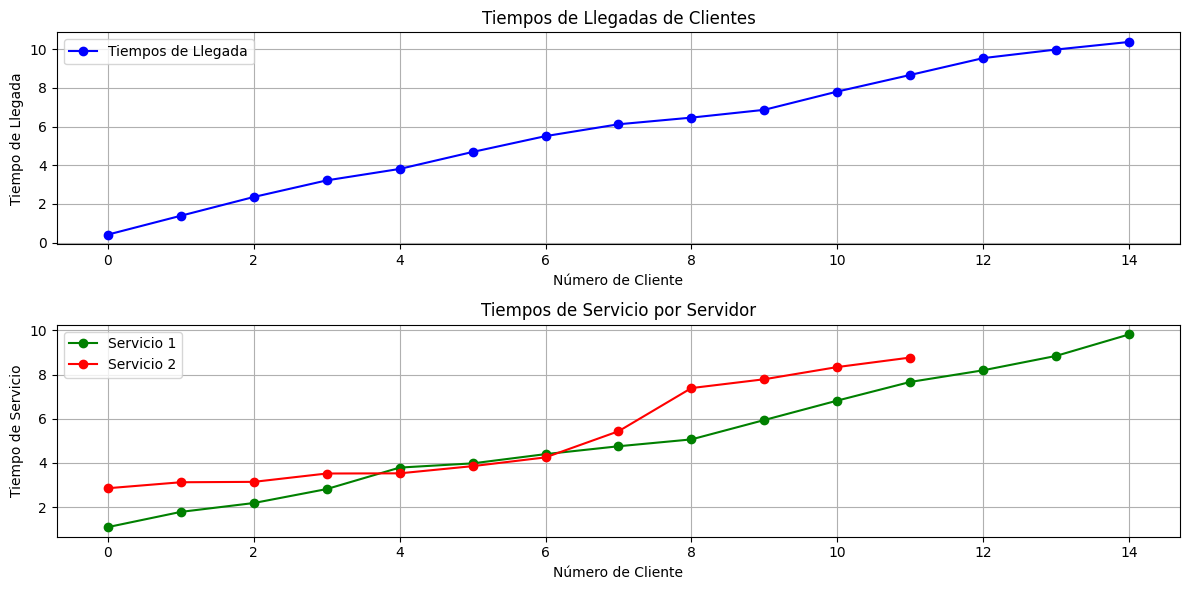

In [5]:
# Graficar resultados
plt.figure(figsize=(12, 6))

# Gráfico de tiempos de llegadas
plt.subplot(2, 1, 1)
plt.plot(tiempos_llegadas, label='Tiempos de Llegada', marker='o', linestyle='-', color='b')
plt.title('Tiempos de Llegadas de Clientes')
plt.xlabel('Número de Cliente')
plt.ylabel('Tiempo de Llegada')
plt.grid()
plt.legend()

# Gráfico de tiempos de servicio
plt.subplot(2, 1, 2)
plt.plot(tiempos_servicio_1, label='Servicio 1', marker='o', linestyle='-', color='g')
plt.plot(tiempos_servicio_2, label='Servicio 2', marker='o', linestyle='-', color='r')
plt.title('Tiempos de Servicio por Servidor')
plt.xlabel('Número de Cliente')
plt.ylabel('Tiempo de Servicio')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()